<a href="https://colab.research.google.com/github/bagusgood/3D_GAN_6AP/blob/main/GAN7AP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import BatchNormalization, LeakyReLU
from keras.optimizers import Adam
from keras.backend import clear_session
from keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook
from tqdm import tqdm
from numpy.random import seed
import tensorflow as tf
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [62]:
#Data Parameters
num_of_classes = 20
data_shape = (6,1)

#MLP Parameters
times_to_run = 50 #Number of times to run MLP model
mlp_epochs = 40
valid_split = 0.20

#GAN Parameters
latent_dim = 100
gan_epochs = 100

#Random Seeds
selection_seed = 150
seed_multiplier = 1000

In [63]:
#dataset = pd.read_csv("drive/MyDrive/dataset7AP.csv")
dataset = pd.read_csv("drive/MyDrive/Data6APBaru.csv")
labels = dataset.Class.values
labels = labels - 1 #Original label values are from 1 to 4
features = dataset.drop(columns='Class').values

In [64]:
tr_fea, X_test, tr_label, Y_test = train_test_split(features,
                                                    labels,
                                                    test_size=0.5,
                                                    random_state= selection_seed,
                                                    stratify=labels)

In [65]:
cb1 = widgets.Checkbox(description="Generate missing data only")
slider1 = widgets.FloatSlider(value=0.1, min=0.05, max=1, step=0.05)
slider2 = widgets.IntSlider(value=250, min=0, max=1000, step=250)
vb = widgets.VBox(children = [slider2])
def checkbox(button):
    if button['new']:
        vb.children = []
        slider2.value = 250 - int(slider1.value*250)
    else:
        vb.children = [slider2]
        experiment3 = False
cb1.observe(checkbox, names='value')

print("Percentage of Real Data:")
display(slider1)
print("Number of datapoints GAN generates:")
display(vb)
display(cb1)

Percentage of Real Data:


FloatSlider(value=0.1, max=1.0, min=0.05, step=0.05)

Number of datapoints GAN generates:


Checkbox(value=False, description='Generate missing data only')

In [66]:
fraction_of_data = slider1.value
data_to_gen = slider2.value

X_train = []
Z_train = [] #This is the same as X_train, but it's used for training the GAN
Y_train = []

for idx in range(20):
    number_filter = np.where(tr_label == idx)
    X_filtered, Y_filtered = tr_fea[number_filter], tr_label[number_filter]

    num_of_data = (int)(fraction_of_data*X_filtered.shape[0])
    RandIndex = np.random.choice(X_filtered.shape[0],
                                 num_of_data,
                                 replace=False)
    Z_train.append(X_filtered[RandIndex])
    X_train.extend(X_filtered[RandIndex])
    Y_train.extend(Y_filtered[RandIndex])

X_train = np.asarray(X_train, dtype=np.float32)
Y_train = np.asarray(Y_train, dtype=np.float32)

X_train, Y_train = shuffle(X_train, Y_train)

Y_train_encoded = to_categorical(Y_train)
Y_test_encoded = to_categorical(Y_test)

In [67]:
#Data must be standized using standard scaler before using the MLP.
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.fit_transform(X_test)

In [68]:
all_test_loss =[]
all_test_acc = []
history = []

for i in tqdm_notebook(range(times_to_run)):
    seed(i*seed_multiplier)
    tf.random.set_seed(i*seed_multiplier)

    model = Sequential()
    model.add(Dense(512, input_shape=(6,), activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(20, activation='softmax'))

    model.compile(optimizer=Adam(0.0002, 0.5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history_temp = model.fit(X_train_transformed,
                            Y_train_encoded,
                            epochs=mlp_epochs,
                            batch_size=64,
                            validation_split=valid_split,
                            verbose=0)
    history.append(history_temp)
    test_loss, test_acc = model.evaluate(X_test_transformed,
                                         Y_test_encoded,
                                         verbose=0)

    print("#{} Test acc:".format(i), test_acc)

    all_test_acc.append(test_acc)
    all_test_loss.append(test_loss)
    del(model)
    clear_session()

def average(lst):
    return sum(lst) / len(lst)

avr = round(average(all_test_acc),3)
print("AVERAGE TEST ACCURACY : ",avr)

<ipython-input-68-3192e2ed082d>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(times_to_run)):


  0%|          | 0/50 [00:00<?, ?it/s]

#0 Test acc: 0.5285714268684387
#1 Test acc: 0.4399999976158142
#2 Test acc: 0.25999999046325684
#3 Test acc: 0.49142858386039734
#4 Test acc: 0.4628571569919586
#5 Test acc: 0.4514285624027252
#6 Test acc: 0.5171428322792053
#7 Test acc: 0.6342856884002686
#8 Test acc: 0.677142858505249
#9 Test acc: 0.508571445941925
#10 Test acc: 0.48571428656578064
#11 Test acc: 0.5114285945892334
#12 Test acc: 0.48571428656578064
#13 Test acc: 0.5542857050895691
#14 Test acc: 0.4457142949104309
#15 Test acc: 0.41999998688697815
#16 Test acc: 0.5314285755157471
#17 Test acc: 0.37142857909202576
#18 Test acc: 0.39142856001853943
#19 Test acc: 0.5628571510314941
#20 Test acc: 0.4828571379184723
#21 Test acc: 0.4399999976158142
#22 Test acc: 0.47999998927116394
#23 Test acc: 0.44857141375541687
#24 Test acc: 0.4714285731315613
#25 Test acc: 0.5771428346633911
#26 Test acc: 0.46000000834465027
#27 Test acc: 0.49714285135269165
#28 Test acc: 0.488571435213089
#29 Test acc: 0.5514285564422607
#30 Test acc

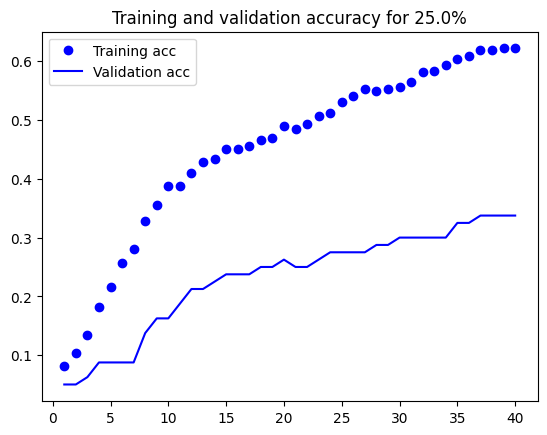

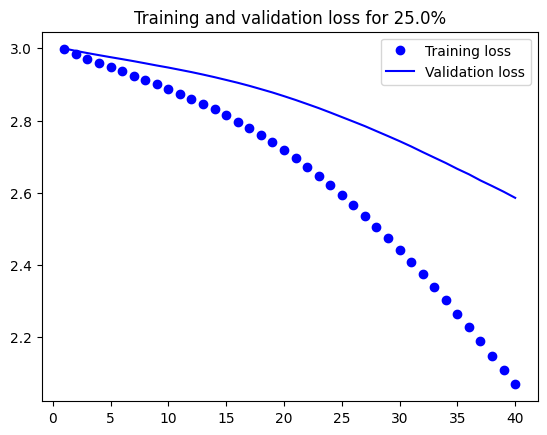

In [61]:
trainacc = []
trainloss = []
valacc = []
valloss = []
for i in range (len(history)):
    trainacc.append(history[i].history['accuracy'])
    trainloss.append(history[i].history['loss'])
    valacc.append(history[i].history['val_accuracy'])
    valloss.append(history[i].history['val_loss'])

acc = np.mean(trainacc, axis=0)
val_acc = np.mean(valacc, axis=0)
loss = np.mean(trainloss, axis=0)
val_loss = np.mean(valloss, axis=0)
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy for {}%'.format(fraction_of_data*100))
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for {}%'.format(fraction_of_data*100))
plt.legend()
plt.savefig("Train - {}%.png".format(fraction_of_data*100))

In [112]:
def build_generator():
    model = Sequential()

    model.add(Dense(256, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(np.prod(data_shape), activation='tanh'))
    model.add(Reshape(data_shape))

    #model.summary()

    noise = Input(shape=(latent_dim,))
    gendata = model(noise)

    return Model(noise, gendata)

def build_discriminator():

    model = Sequential()

    model.add(Flatten(input_shape=data_shape))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))

    #model.summary()

    data = Input(shape=data_shape)
    validity = model(data)

    return Model(data, validity)

def train(epochs, features, batch_size=128):

    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
            idx = np.random.randint(0, features.shape[0], batch_size)
            data = features[idx]

            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            gen_data = generator.predict(noise)

            d_loss_real = discriminator.train_on_batch(data, valid)
            d_loss_fake = discriminator.train_on_batch(gen_data, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            g_loss = combined.train_on_batch(noise, valid)

            # Print progress
            if gan_epochs % 10 == 0:
              print(f"Epoch: {epoch}, Discriminator Loss: {d_loss[0]}, Generator Loss: {g_loss}")

In [113]:
gen_data = []

for i in tqdm(range(num_of_classes)):
    discriminator = build_discriminator()
    discriminator.compile(loss='binary_crossentropy',
                          optimizer=Adam(0.0002, 0.5),
                          metrics=['accuracy'])

    generator = build_generator()
    noise = Input(shape=(latent_dim,))
    gendata = generator(noise)
    discriminator.trainable = False
    validity = discriminator(gendata)
    combined = Model(noise, validity)
    combined.compile(loss='binary_crossentropy',
                    optimizer=Adam(0.0002, 0.5))

    minimaxscaler = MinMaxScaler((-1,1))
    Z_train_transformed = minimaxscaler.fit_transform(Z_train[i])
    Z_train_transformed = np.expand_dims(Z_train_transformed, axis=2)

    train(epochs=gan_epochs,
          features=Z_train_transformed,
          batch_size=64)

    noise = np.random.normal(0, 1, (data_to_gen, latent_dim))
    gen_data_temp = generator.predict(noise)
    gen_data_temp = np.asarray(gen_data_temp, dtype=np.float32)
    gen_data_temp = np.squeeze(gen_data_temp)
    gen_data_temp = minimaxscaler.inverse_transform(gen_data_temp)

    gen_data.append(gen_data_temp)

    clear_session()
    del(discriminator)
    del(generator)
    del(combined)

gen_data = np.asarray(gen_data, dtype=np.float32)

  0%|          | 0/20 [00:00<?, ?it/s]

2/2 [==============================] - 0s 8ms/step
Epoch: 0, Discriminator Loss: 0.7013921141624451, Generator Loss: 0.6937581300735474
2/2 [==============================] - 0s 12ms/step
Epoch: 1, Discriminator Loss: 0.6853605508804321, Generator Loss: 0.6871979832649231
2/2 [==============================] - 0s 9ms/step
Epoch: 2, Discriminator Loss: 0.6713793873786926, Generator Loss: 0.6806621551513672
2/2 [==============================] - 0s 9ms/step
Epoch: 3, Discriminator Loss: 0.6587671041488647, Generator Loss: 0.6769921779632568
2/2 [==============================] - 0s 10ms/step
Epoch: 4, Discriminator Loss: 0.6479320228099823, Generator Loss: 0.6902902126312256
2/2 [==============================] - 0s 8ms/step
Epoch: 5, Discriminator Loss: 0.6341500580310822, Generator Loss: 0.7041265964508057
2/2 [==============================] - 0s 7ms/step
Epoch: 6, Discriminator Loss: 0.6111635565757751, Generator Loss: 0.6977641582489014
2/2 [==============================] - 0s 7ms/

  5%|▌         | 1/20 [00:19<06:16, 19.83s/it]

2/2 [==============================] - 0s 8ms/step
Epoch: 0, Discriminator Loss: 0.7164722383022308, Generator Loss: 0.697150707244873
2/2 [==============================] - 0s 12ms/step
Epoch: 1, Discriminator Loss: 0.6946455538272858, Generator Loss: 0.6893452405929565
2/2 [==============================] - 0s 12ms/step
Epoch: 2, Discriminator Loss: 0.6774675250053406, Generator Loss: 0.6909727454185486
2/2 [==============================] - 0s 8ms/step
Epoch: 3, Discriminator Loss: 0.6609160006046295, Generator Loss: 0.6909369230270386
2/2 [==============================] - 0s 8ms/step
Epoch: 4, Discriminator Loss: 0.6435713171958923, Generator Loss: 0.6890887022018433
2/2 [==============================] - 0s 8ms/step
Epoch: 5, Discriminator Loss: 0.6292462348937988, Generator Loss: 0.6860383749008179
2/2 [==============================] - 0s 8ms/step
Epoch: 6, Discriminator Loss: 0.6167588531970978, Generator Loss: 0.7025223970413208
2/2 [==============================] - 0s 9ms/s

 10%|█         | 2/20 [00:48<07:28, 24.92s/it]

2/2 [==============================] - 0s 8ms/step
Epoch: 0, Discriminator Loss: 0.6876863241195679, Generator Loss: 0.6873655319213867
2/2 [==============================] - 0s 8ms/step
Epoch: 1, Discriminator Loss: 0.6696987748146057, Generator Loss: 0.6791338324546814
2/2 [==============================] - 0s 8ms/step
Epoch: 2, Discriminator Loss: 0.6579096913337708, Generator Loss: 0.6750878095626831
2/2 [==============================] - 0s 8ms/step
Epoch: 3, Discriminator Loss: 0.6530351638793945, Generator Loss: 0.6613839864730835
2/2 [==============================] - 0s 8ms/step
Epoch: 4, Discriminator Loss: 0.644430547952652, Generator Loss: 0.6540893912315369
2/2 [==============================] - 0s 8ms/step
Epoch: 5, Discriminator Loss: 0.6437366008758545, Generator Loss: 0.6440277099609375
2/2 [==============================] - 0s 8ms/step
Epoch: 6, Discriminator Loss: 0.6408864259719849, Generator Loss: 0.6381458044052124
2/2 [==============================] - 0s 8ms/ste

 15%|█▌        | 3/20 [01:09<06:33, 23.16s/it]

2/2 [==============================] - 0s 10ms/step
Epoch: 0, Discriminator Loss: 0.6716416478157043, Generator Loss: 0.6439117193222046
2/2 [==============================] - 0s 9ms/step
Epoch: 1, Discriminator Loss: 0.6569665372371674, Generator Loss: 0.6315139532089233
2/2 [==============================] - 0s 8ms/step
Epoch: 2, Discriminator Loss: 0.6531171798706055, Generator Loss: 0.621475100517273
2/2 [==============================] - 0s 8ms/step
Epoch: 3, Discriminator Loss: 0.6437768936157227, Generator Loss: 0.6187079548835754
2/2 [==============================] - 0s 9ms/step
Epoch: 4, Discriminator Loss: 0.6391155123710632, Generator Loss: 0.6196482181549072
2/2 [==============================] - 0s 8ms/step
Epoch: 5, Discriminator Loss: 0.6375916600227356, Generator Loss: 0.6193279027938843
2/2 [==============================] - 0s 9ms/step
Epoch: 6, Discriminator Loss: 0.6278630793094635, Generator Loss: 0.6075418591499329
2/2 [==============================] - 0s 7ms/st

 20%|██        | 4/20 [01:29<05:52, 22.06s/it]

2/2 [==============================] - 0s 9ms/step
Epoch: 0, Discriminator Loss: 0.6915817260742188, Generator Loss: 0.6731772422790527
2/2 [==============================] - 0s 8ms/step
Epoch: 1, Discriminator Loss: 0.6728508174419403, Generator Loss: 0.663741946220398
2/2 [==============================] - 0s 8ms/step
Epoch: 2, Discriminator Loss: 0.6542983055114746, Generator Loss: 0.654880702495575
2/2 [==============================] - 0s 8ms/step
Epoch: 3, Discriminator Loss: 0.6462721228599548, Generator Loss: 0.6545936465263367
2/2 [==============================] - 0s 8ms/step
Epoch: 4, Discriminator Loss: 0.6446073055267334, Generator Loss: 0.6344692707061768
2/2 [==============================] - 0s 8ms/step
Epoch: 5, Discriminator Loss: 0.6318222284317017, Generator Loss: 0.6439971327781677
2/2 [==============================] - 0s 8ms/step
Epoch: 6, Discriminator Loss: 0.6222837269306183, Generator Loss: 0.6382482051849365
2/2 [==============================] - 0s 8ms/step

 25%|██▌       | 5/20 [01:50<05:25, 21.71s/it]

2/2 [==============================] - 0s 8ms/step
Epoch: 0, Discriminator Loss: 0.7026136517524719, Generator Loss: 0.6718229055404663
2/2 [==============================] - 0s 9ms/step
Epoch: 1, Discriminator Loss: 0.684342622756958, Generator Loss: 0.6546396613121033
2/2 [==============================] - 0s 10ms/step
Epoch: 2, Discriminator Loss: 0.6797377169132233, Generator Loss: 0.646489143371582
2/2 [==============================] - 0s 8ms/step
Epoch: 3, Discriminator Loss: 0.6692484319210052, Generator Loss: 0.637413740158081
2/2 [==============================] - 0s 8ms/step
Epoch: 4, Discriminator Loss: 0.6644611656665802, Generator Loss: 0.6333940029144287
2/2 [==============================] - 0s 8ms/step
Epoch: 5, Discriminator Loss: 0.6579921245574951, Generator Loss: 0.6285777688026428
2/2 [==============================] - 0s 9ms/step
Epoch: 6, Discriminator Loss: 0.6513869166374207, Generator Loss: 0.6347477436065674
2/2 [==============================] - 0s 9ms/step

 30%|███       | 6/20 [02:10<04:54, 21.02s/it]

2/2 [==============================] - 0s 9ms/step
Epoch: 0, Discriminator Loss: 0.7090825438499451, Generator Loss: 0.6741133332252502
2/2 [==============================] - 0s 8ms/step
Epoch: 1, Discriminator Loss: 0.6834333539009094, Generator Loss: 0.6590477824211121
2/2 [==============================] - 0s 11ms/step
Epoch: 2, Discriminator Loss: 0.6703687906265259, Generator Loss: 0.653978168964386
2/2 [==============================] - 0s 7ms/step
Epoch: 3, Discriminator Loss: 0.658998966217041, Generator Loss: 0.6407551765441895
2/2 [==============================] - 0s 10ms/step
Epoch: 4, Discriminator Loss: 0.6422251462936401, Generator Loss: 0.6390372514724731
2/2 [==============================] - 0s 11ms/step
Epoch: 5, Discriminator Loss: 0.6417095065116882, Generator Loss: 0.6434258222579956
2/2 [==============================] - 0s 13ms/step
Epoch: 6, Discriminator Loss: 0.6342623829841614, Generator Loss: 0.6454834342002869
2/2 [==============================] - 0s 12ms

 35%|███▌      | 7/20 [02:32<04:39, 21.48s/it]

2/2 [==============================] - 0s 9ms/step
Epoch: 0, Discriminator Loss: 0.6690589189529419, Generator Loss: 0.6308699250221252
2/2 [==============================] - 0s 9ms/step
Epoch: 1, Discriminator Loss: 0.6502440571784973, Generator Loss: 0.6226401925086975
2/2 [==============================] - 0s 8ms/step
Epoch: 2, Discriminator Loss: 0.6462544500827789, Generator Loss: 0.6115673184394836
2/2 [==============================] - 0s 9ms/step
Epoch: 3, Discriminator Loss: 0.6442885994911194, Generator Loss: 0.598915159702301
2/2 [==============================] - 0s 10ms/step
Epoch: 4, Discriminator Loss: 0.6472734212875366, Generator Loss: 0.6126511693000793
2/2 [==============================] - 0s 9ms/step
Epoch: 5, Discriminator Loss: 0.6384005546569824, Generator Loss: 0.6038498282432556
2/2 [==============================] - 0s 9ms/step
Epoch: 6, Discriminator Loss: 0.6421326696872711, Generator Loss: 0.5953515768051147
2/2 [==============================] - 0s 9ms/st

 40%|████      | 8/20 [02:52<04:10, 20.89s/it]

2/2 [==============================] - 0s 10ms/step
Epoch: 0, Discriminator Loss: 0.6825616657733917, Generator Loss: 0.6368058919906616
2/2 [==============================] - 0s 14ms/step
Epoch: 1, Discriminator Loss: 0.6625739336013794, Generator Loss: 0.6179834604263306
2/2 [==============================] - 0s 16ms/step
Epoch: 2, Discriminator Loss: 0.6482400298118591, Generator Loss: 0.6058043241500854
2/2 [==============================] - 0s 11ms/step
Epoch: 3, Discriminator Loss: 0.6427519917488098, Generator Loss: 0.5985625386238098
2/2 [==============================] - 0s 8ms/step
Epoch: 4, Discriminator Loss: 0.6556447744369507, Generator Loss: 0.5870144963264465
2/2 [==============================] - 0s 11ms/step
Epoch: 5, Discriminator Loss: 0.6514685451984406, Generator Loss: 0.5887978076934814
2/2 [==============================] - 0s 8ms/step
Epoch: 6, Discriminator Loss: 0.6426917910575867, Generator Loss: 0.5718897581100464
2/2 [==============================] - 0s 1

 45%|████▌     | 9/20 [03:12<03:47, 20.69s/it]

2/2 [==============================] - 0s 10ms/step
Epoch: 0, Discriminator Loss: 0.6829325258731842, Generator Loss: 0.646953821182251
2/2 [==============================] - 0s 9ms/step
Epoch: 1, Discriminator Loss: 0.6565643548965454, Generator Loss: 0.6384515762329102
2/2 [==============================] - 0s 9ms/step
Epoch: 2, Discriminator Loss: 0.646503210067749, Generator Loss: 0.6309069395065308
2/2 [==============================] - 0s 9ms/step
Epoch: 3, Discriminator Loss: 0.6364753246307373, Generator Loss: 0.6225513219833374
2/2 [==============================] - 0s 8ms/step
Epoch: 4, Discriminator Loss: 0.631149560213089, Generator Loss: 0.6230634450912476
2/2 [==============================] - 0s 9ms/step
Epoch: 5, Discriminator Loss: 0.6311325281858444, Generator Loss: 0.612008810043335
2/2 [==============================] - 0s 9ms/step
Epoch: 6, Discriminator Loss: 0.6240815818309784, Generator Loss: 0.61969393491745
2/2 [==============================] - 0s 8ms/step
Ep

 50%|█████     | 10/20 [03:32<03:22, 20.26s/it]

2/2 [==============================] - 0s 9ms/step
Epoch: 0, Discriminator Loss: 0.7033116817474365, Generator Loss: 0.651827335357666
2/2 [==============================] - 0s 7ms/step
Epoch: 1, Discriminator Loss: 0.6772564351558685, Generator Loss: 0.6412369012832642
2/2 [==============================] - 0s 9ms/step
Epoch: 2, Discriminator Loss: 0.6630719304084778, Generator Loss: 0.6298925280570984
2/2 [==============================] - 0s 14ms/step
Epoch: 3, Discriminator Loss: 0.6569788455963135, Generator Loss: 0.6275601387023926
2/2 [==============================] - 0s 8ms/step
Epoch: 4, Discriminator Loss: 0.6458679735660553, Generator Loss: 0.6154823303222656
2/2 [==============================] - 0s 7ms/step
Epoch: 5, Discriminator Loss: 0.6338475346565247, Generator Loss: 0.6207281351089478
2/2 [==============================] - 0s 11ms/step
Epoch: 6, Discriminator Loss: 0.6292112171649933, Generator Loss: 0.6292819976806641
2/2 [==============================] - 0s 8ms/s

 55%|█████▌    | 11/20 [03:52<03:02, 20.28s/it]

2/2 [==============================] - 0s 9ms/step
Epoch: 0, Discriminator Loss: 0.7088771760463715, Generator Loss: 0.6935641169548035
2/2 [==============================] - 0s 9ms/step
Epoch: 1, Discriminator Loss: 0.6870428621768951, Generator Loss: 0.6831454038619995
2/2 [==============================] - 0s 10ms/step
Epoch: 2, Discriminator Loss: 0.6718135178089142, Generator Loss: 0.6772928833961487
2/2 [==============================] - 0s 9ms/step
Epoch: 3, Discriminator Loss: 0.6680159270763397, Generator Loss: 0.670212984085083
2/2 [==============================] - 0s 10ms/step
Epoch: 4, Discriminator Loss: 0.6570375859737396, Generator Loss: 0.6577284932136536
2/2 [==============================] - 0s 9ms/step
Epoch: 5, Discriminator Loss: 0.6454300284385681, Generator Loss: 0.6685011386871338
2/2 [==============================] - 0s 9ms/step
Epoch: 6, Discriminator Loss: 0.6408607959747314, Generator Loss: 0.6638929843902588
2/2 [==============================] - 0s 12ms/

 60%|██████    | 12/20 [04:11<02:39, 19.95s/it]

2/2 [==============================] - 0s 9ms/step
Epoch: 0, Discriminator Loss: 0.6903998255729675, Generator Loss: 0.6735700368881226
2/2 [==============================] - 0s 9ms/step
Epoch: 1, Discriminator Loss: 0.673225462436676, Generator Loss: 0.6577563285827637
2/2 [==============================] - 0s 11ms/step
Epoch: 2, Discriminator Loss: 0.6595346927642822, Generator Loss: 0.6448900699615479
2/2 [==============================] - 0s 9ms/step
Epoch: 3, Discriminator Loss: 0.6504340171813965, Generator Loss: 0.6445736885070801
2/2 [==============================] - 0s 9ms/step
Epoch: 4, Discriminator Loss: 0.6443681418895721, Generator Loss: 0.6286698579788208
2/2 [==============================] - 0s 9ms/step
Epoch: 5, Discriminator Loss: 0.6376039683818817, Generator Loss: 0.6279627084732056
2/2 [==============================] - 0s 8ms/step
Epoch: 6, Discriminator Loss: 0.6350698471069336, Generator Loss: 0.6298864483833313
2/2 [==============================] - 0s 12ms/s

 65%|██████▌   | 13/20 [04:31<02:20, 20.05s/it]

2/2 [==============================] - 0s 10ms/step
Epoch: 0, Discriminator Loss: 0.7143576145172119, Generator Loss: 0.7187172174453735
2/2 [==============================] - 0s 10ms/step
Epoch: 1, Discriminator Loss: 0.6889289021492004, Generator Loss: 0.7168617248535156
2/2 [==============================] - 0s 9ms/step
Epoch: 2, Discriminator Loss: 0.6622063517570496, Generator Loss: 0.7256211638450623
2/2 [==============================] - 0s 9ms/step
Epoch: 3, Discriminator Loss: 0.6426568925380707, Generator Loss: 0.7288831472396851
2/2 [==============================] - 0s 11ms/step
Epoch: 4, Discriminator Loss: 0.6311065554618835, Generator Loss: 0.7186967730522156
2/2 [==============================] - 0s 8ms/step
Epoch: 5, Discriminator Loss: 0.6096993684768677, Generator Loss: 0.740536093711853
2/2 [==============================] - 0s 9ms/step
Epoch: 6, Discriminator Loss: 0.5864028632640839, Generator Loss: 0.7535903453826904
2/2 [==============================] - 0s 9ms/

 70%|███████   | 14/20 [04:51<01:58, 19.83s/it]

2/2 [==============================] - 0s 7ms/step
Epoch: 0, Discriminator Loss: 0.7063893675804138, Generator Loss: 0.6954792141914368
2/2 [==============================] - 0s 11ms/step
Epoch: 1, Discriminator Loss: 0.6807837784290314, Generator Loss: 0.6869100332260132
2/2 [==============================] - 0s 9ms/step
Epoch: 2, Discriminator Loss: 0.6611620485782623, Generator Loss: 0.677339494228363
2/2 [==============================] - 0s 12ms/step
Epoch: 3, Discriminator Loss: 0.6462779343128204, Generator Loss: 0.6900091767311096
2/2 [==============================] - 0s 9ms/step
Epoch: 4, Discriminator Loss: 0.6246996521949768, Generator Loss: 0.6846215724945068
2/2 [==============================] - 0s 9ms/step
Epoch: 5, Discriminator Loss: 0.619914323091507, Generator Loss: 0.6970564126968384
2/2 [==============================] - 0s 13ms/step
Epoch: 6, Discriminator Loss: 0.602718859910965, Generator Loss: 0.693622350692749
2/2 [==============================] - 0s 9ms/ste

 75%|███████▌  | 15/20 [05:11<01:39, 19.97s/it]

2/2 [==============================] - 0s 7ms/step
Epoch: 0, Discriminator Loss: 0.7081038057804108, Generator Loss: 0.6724523305892944
2/2 [==============================] - 0s 11ms/step
Epoch: 1, Discriminator Loss: 0.6817581057548523, Generator Loss: 0.6653426289558411
2/2 [==============================] - 0s 9ms/step
Epoch: 2, Discriminator Loss: 0.664578914642334, Generator Loss: 0.652251124382019
2/2 [==============================] - 0s 11ms/step
Epoch: 3, Discriminator Loss: 0.6595421731472015, Generator Loss: 0.6499894261360168
2/2 [==============================] - 0s 10ms/step
Epoch: 4, Discriminator Loss: 0.6564977765083313, Generator Loss: 0.6447469592094421
2/2 [==============================] - 0s 10ms/step
Epoch: 5, Discriminator Loss: 0.6560139060020447, Generator Loss: 0.6355259418487549
2/2 [==============================] - 0s 9ms/step
Epoch: 6, Discriminator Loss: 0.6439167261123657, Generator Loss: 0.6440253257751465
2/2 [==============================] - 0s 10ms

 80%|████████  | 16/20 [05:31<01:19, 19.92s/it]

2/2 [==============================] - 0s 11ms/step
Epoch: 0, Discriminator Loss: 0.7138379514217377, Generator Loss: 0.6859035491943359
2/2 [==============================] - 0s 8ms/step
Epoch: 1, Discriminator Loss: 0.6952183842658997, Generator Loss: 0.6680558919906616
2/2 [==============================] - 0s 9ms/step
Epoch: 2, Discriminator Loss: 0.6833154559135437, Generator Loss: 0.6627829074859619
2/2 [==============================] - 0s 9ms/step
Epoch: 3, Discriminator Loss: 0.6705806851387024, Generator Loss: 0.6503173112869263
2/2 [==============================] - 0s 8ms/step
Epoch: 4, Discriminator Loss: 0.659981369972229, Generator Loss: 0.6489885449409485
2/2 [==============================] - 0s 10ms/step
Epoch: 5, Discriminator Loss: 0.6518312096595764, Generator Loss: 0.6417309045791626
2/2 [==============================] - 0s 9ms/step
Epoch: 6, Discriminator Loss: 0.6446416079998016, Generator Loss: 0.6441912651062012
2/2 [==============================] - 0s 8ms/s

 85%|████████▌ | 17/20 [05:51<00:59, 19.97s/it]

2/2 [==============================] - 0s 16ms/step
Epoch: 0, Discriminator Loss: 0.6846393942832947, Generator Loss: 0.6720173358917236
2/2 [==============================] - 0s 9ms/step
Epoch: 1, Discriminator Loss: 0.6692387461662292, Generator Loss: 0.657596230506897
2/2 [==============================] - 0s 10ms/step
Epoch: 2, Discriminator Loss: 0.6578434407711029, Generator Loss: 0.6514161229133606
2/2 [==============================] - 0s 7ms/step
Epoch: 3, Discriminator Loss: 0.6513603329658508, Generator Loss: 0.6444267630577087
2/2 [==============================] - 0s 8ms/step
Epoch: 4, Discriminator Loss: 0.6448071002960205, Generator Loss: 0.6381716132164001
2/2 [==============================] - 0s 8ms/step
Epoch: 5, Discriminator Loss: 0.6408974528312683, Generator Loss: 0.6463693976402283
2/2 [==============================] - 0s 10ms/step
Epoch: 6, Discriminator Loss: 0.6348978281021118, Generator Loss: 0.6381344199180603
2/2 [==============================] - 0s 11ms

 90%|█████████ | 18/20 [06:11<00:40, 20.03s/it]

2/2 [==============================] - 0s 10ms/step
Epoch: 0, Discriminator Loss: 0.7308467328548431, Generator Loss: 0.7317431569099426
2/2 [==============================] - 0s 11ms/step
Epoch: 1, Discriminator Loss: 0.7111347019672394, Generator Loss: 0.7138060331344604
2/2 [==============================] - 0s 7ms/step
Epoch: 2, Discriminator Loss: 0.6916098296642303, Generator Loss: 0.7078460454940796
2/2 [==============================] - 0s 12ms/step
Epoch: 3, Discriminator Loss: 0.6855323910713196, Generator Loss: 0.7019884586334229
2/2 [==============================] - 0s 9ms/step
Epoch: 4, Discriminator Loss: 0.6712838709354401, Generator Loss: 0.7057620286941528
2/2 [==============================] - 0s 11ms/step
Epoch: 5, Discriminator Loss: 0.6609216034412384, Generator Loss: 0.6991657614707947
2/2 [==============================] - 0s 10ms/step
Epoch: 6, Discriminator Loss: 0.6461048722267151, Generator Loss: 0.6827796697616577
2/2 [==============================] - 0s 9

 95%|█████████▌| 19/20 [06:32<00:20, 20.42s/it]

2/2 [==============================] - 0s 14ms/step
Epoch: 0, Discriminator Loss: 0.7009195685386658, Generator Loss: 0.7171387672424316
2/2 [==============================] - 0s 8ms/step
Epoch: 1, Discriminator Loss: 0.6731048226356506, Generator Loss: 0.7052797079086304
2/2 [==============================] - 0s 9ms/step
Epoch: 2, Discriminator Loss: 0.6573531031608582, Generator Loss: 0.6989258527755737
2/2 [==============================] - 0s 9ms/step
Epoch: 3, Discriminator Loss: 0.6378941237926483, Generator Loss: 0.7011330127716064
2/2 [==============================] - 0s 10ms/step
Epoch: 4, Discriminator Loss: 0.6277550756931305, Generator Loss: 0.702986478805542
2/2 [==============================] - 0s 9ms/step
Epoch: 5, Discriminator Loss: 0.6324021220207214, Generator Loss: 0.7089941501617432
2/2 [==============================] - 0s 9ms/step
Epoch: 6, Discriminator Loss: 0.6122668087482452, Generator Loss: 0.7080792188644409
2/2 [==============================] - 0s 7ms/s

100%|██████████| 20/20 [06:54<00:00, 20.71s/it]


In [114]:
gen_label = []
for i in range(20):
    gen_label_temp = np.tile(i, data_to_gen)
    gen_label.extend(gen_label_temp)

gen_label = np.asarray(gen_label, dtype=np.float32)
gen_label_encoded = to_categorical(gen_label)

gen_data_reshaped = gen_data.reshape(num_of_classes*data_to_gen, data_shape[0])

X_train_gan, Y_train_gan = shuffle(gen_data_reshaped,
                                   gen_label_encoded,
                                   random_state=5)

new_x_train = np.concatenate((X_train, X_train_gan), axis=0)
new_y_train = np.concatenate((Y_train_encoded, Y_train_gan), axis=0)

new_x_train, new_y_train = shuffle(new_x_train, new_y_train, random_state=15)
new_x_train_transformed = scaler.fit_transform(new_x_train)

In [115]:
all_test_loss_gan =[]
all_test_acc_gan = []
ganhistory = []

for i in tqdm_notebook(range(50)):
    seed(i*seed_multiplier)
    tf.random.set_seed(i*seed_multiplier)

    model = Sequential()
    model.add(Dense(512, input_shape=(6,), activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(20, activation='softmax'))

    model.compile(optimizer=Adam(0.0002, 0.5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    ganhistorytemp = model.fit(new_x_train_transformed,
                    new_y_train,
                    epochs=mlp_epochs,
                    batch_size=64,
                    validation_split=valid_split,
                    verbose = 0)
    ganhistory.append(ganhistorytemp)

    test_loss, test_acc = model.evaluate(X_test_transformed,
                                         Y_test_encoded,
                                         verbose=0)
    print("#{} Test acc:".format(i), test_acc)

    all_test_acc_gan.append(test_acc)
    all_test_loss_gan.append(test_loss)
    del(model)
    clear_session()

def average(lst):
    return sum(lst) / len(lst)

avr = round(average(all_test_acc_gan),3)
print("AVERAGE TEST ACCURACY : ",avr)

<ipython-input-115-928cd9778d31>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(50)):


  0%|          | 0/50 [00:00<?, ?it/s]

#0 Test acc: 0.9342857003211975
#1 Test acc: 0.9514285922050476
#2 Test acc: 0.9342857003211975
#3 Test acc: 0.9428571462631226
#4 Test acc: 0.9399999976158142
#5 Test acc: 0.9428571462631226
#6 Test acc: 0.9371428489685059
#7 Test acc: 0.9371428489685059
#8 Test acc: 0.9628571271896362
#9 Test acc: 0.9371428489685059
#10 Test acc: 0.9371428489685059
#11 Test acc: 0.9314285516738892
#12 Test acc: 0.9514285922050476
#13 Test acc: 0.9514285922050476
#14 Test acc: 0.9457142949104309
#15 Test acc: 0.9399999976158142
#16 Test acc: 0.9342857003211975
#17 Test acc: 0.9342857003211975
#18 Test acc: 0.9342857003211975
#19 Test acc: 0.9457142949104309
#20 Test acc: 0.9371428489685059
#21 Test acc: 0.9428571462631226
#22 Test acc: 0.9599999785423279
#23 Test acc: 0.9457142949104309
#24 Test acc: 0.9514285922050476
#25 Test acc: 0.9457142949104309
#26 Test acc: 0.9571428298950195
#27 Test acc: 0.9428571462631226
#28 Test acc: 0.9371428489685059
#29 Test acc: 0.9399999976158142
#30 Test acc: 0.9571

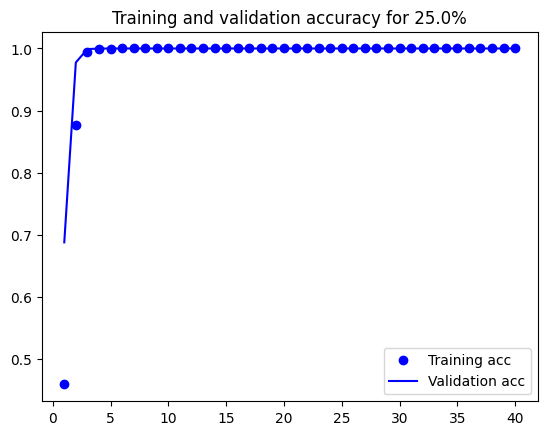

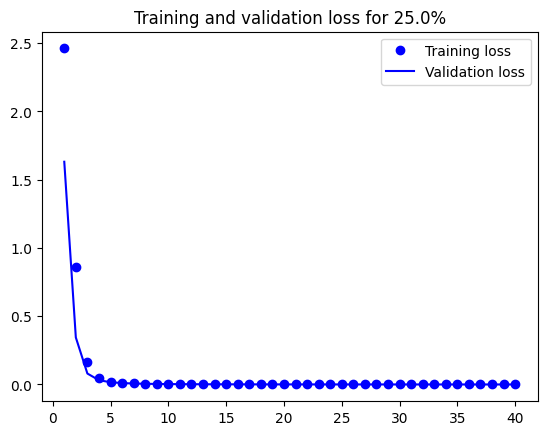

In [117]:
gantrainacc = []
gantrainloss = []
ganvalacc = []
ganvalloss = []
for i in range (len(ganhistory)):
    gantrainacc.append(ganhistory[i].history['accuracy'])
    gantrainloss.append(ganhistory[i].history['loss'])
    ganvalacc.append(ganhistory[i].history['val_accuracy'])
    ganvalloss.append(ganhistory[i].history['val_loss'])

gan_acc = np.mean(gantrainacc, axis=0)
gan_val_acc = np.mean(ganvalacc, axis=0)
gan_loss = np.mean(gantrainloss, axis=0)
gan_val_loss = np.mean(ganvalloss, axis=0)
epochs = range(1, len(gan_acc) + 1)
plt.plot(epochs, gan_acc, 'bo', label='Training acc')
plt.plot(epochs, gan_val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy for {}%'.format(fraction_of_data*100))
plt.legend()
plt.savefig("GANTrainAcc - {}%.png".format(fraction_of_data*100))
plt.figure()
plt.plot(epochs, gan_loss, 'bo', label='Training loss')
plt.plot(epochs, gan_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for {}%'.format(fraction_of_data*100))
plt.legend()
plt.savefig("GANTrainLoss - {}%.png".format(fraction_of_data*100))

In [1]:
plt.plot(epochs, acc, 'bo', label='Real Training')
plt.plot(epochs, val_acc, 'b', label='Real Validation')
plt.plot(epochs, gan_acc, 'ro', label='Real+GAN Training')
plt.plot(epochs, gan_val_acc, 'r', label='Real+GAN Validation')
plt.title('Training and validation accuracy for {}%'.format(fraction_of_data*100))
plt.legend()
plt.savefig("GANREALAcc - {}%.png".format(fraction_of_data*100))
plt.figure()
plt.plot(epochs, loss, 'bo', label='Real Training')
plt.plot(epochs, val_loss, 'b', label='Real Validation')
plt.plot(epochs, gan_loss, 'ro', label='Real+GAN Training')
plt.plot(epochs, gan_val_loss, 'r', label='Real+GAN Validation')
plt.title('Training and validation loss for {}%'.format(fraction_of_data*100))
plt.legend()
plt.savefig("GANREALLoss - {}%.png".format(fraction_of_data*100))

NameError: name 'plt' is not defined